# Project 8: Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

## Data import and first inspection 

In [48]:
#Import libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [49]:
#Read in data from csv file / create dataframe df 
df = pd.read_csv("housing.csv")

In [50]:
#Explore data 
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND


Features:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean



In [51]:
#Inspect data and data types are correct 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- total_bedrooms has some missing values 

In [52]:
#Check missing values in total_bedroom column
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.00,1256.00,nan,570.00,218.00,4.38,161900.00,NEAR BAY
341,-122.17,37.75,38.00,992.00,nan,732.00,259.00,1.62,85100.00,NEAR BAY
538,-122.28,37.78,29.00,5154.00,nan,3741.00,1273.00,2.58,173400.00,NEAR BAY
563,-122.24,37.75,45.00,891.00,nan,384.00,146.00,4.95,247100.00,NEAR BAY
696,-122.10,37.69,41.00,746.00,nan,387.00,161.00,3.91,178400.00,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.00,3620.00,nan,3171.00,779.00,3.34,220500.00,NEAR OCEAN
20268,-119.18,34.19,19.00,2393.00,nan,1938.00,762.00,1.70,167400.00,NEAR OCEAN
20372,-118.88,34.17,15.00,4260.00,nan,1701.00,669.00,5.10,410700.00,<1H OCEAN
20460,-118.75,34.29,17.00,5512.00,nan,2734.00,814.00,6.61,258100.00,<1H OCEAN


In [53]:
#Check for duplicates
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [54]:
#Gather summary satistics about the data and non numeric columns 
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00,20640
unique,nan,nan,nan,nan,nan,nan,nan,nan,nan,5
top,nan,nan,nan,nan,nan,nan,nan,nan,nan,<1H OCEAN
freq,nan,nan,nan,nan,nan,nan,nan,nan,nan,9136
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82,NaN
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62,NaN
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00,NaN
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00,NaN
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00,NaN
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00,NaN


In [55]:
#Filter non numeric columns for describe 
df.describe(include = "O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [56]:
#Filter value counts for ocean_proximity 
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [57]:
#Filter total rooms_rooms value counts
df.total_rooms.value_counts()

1527.00    18
1613.00    17
1582.00    17
2127.00    16
1703.00    15
           ..
7784.00     1
7916.00     1
6859.00     1
6846.00     1
5639.00     1
Name: total_rooms, Length: 5926, dtype: int64

__Conclusion__ 

- Filtered data does not give clear representation of the data so far. Plot in histograph for better frst inspection.

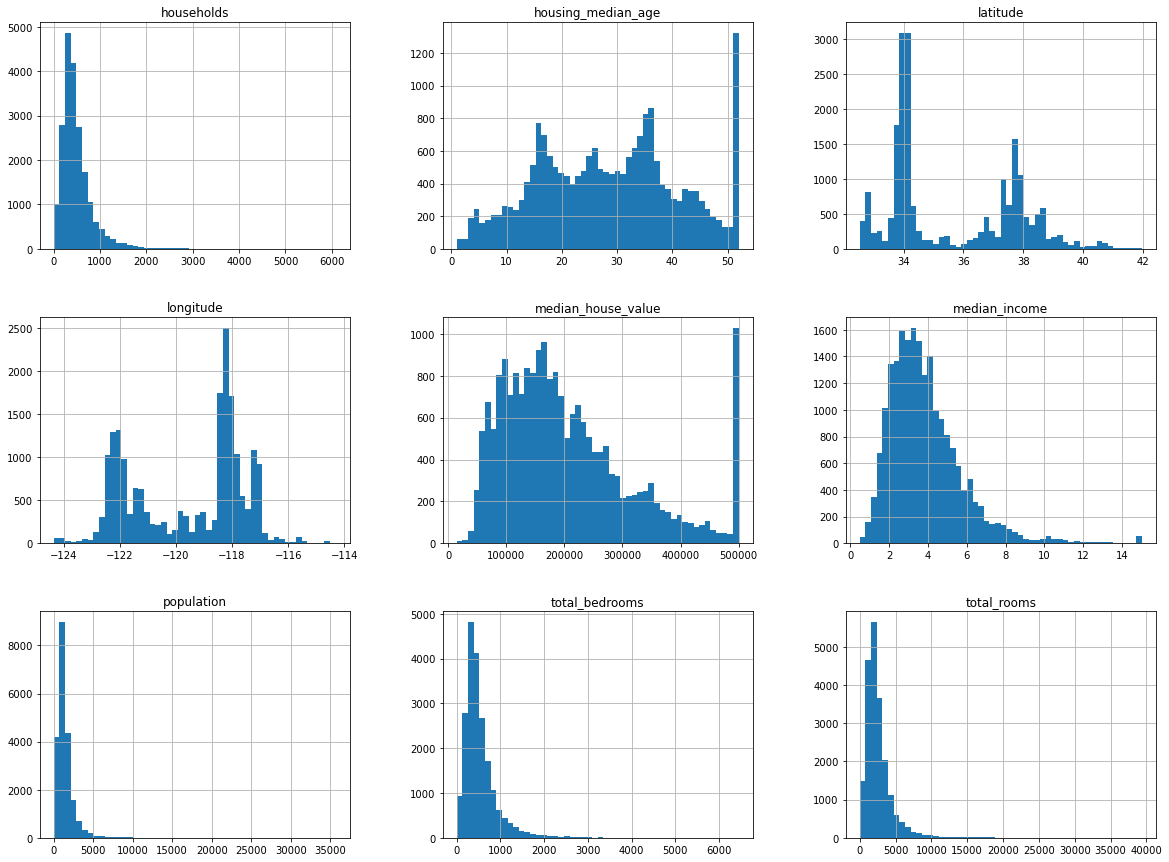

In [58]:
#Put data into histograph
df.hist(bins = 50, figsize=(20, 15))
plt.show()

# Data cleaning and creating additional Features 


In [59]:
#Inspect data to clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Total bedrooms is the only column missing values of 207 

- Drop the rows missing values  

In [60]:
df.dropna(inplace = True)

In [61]:
#check data again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [62]:
df["rooms_per_household"] = df.total_rooms.div(df.households)

In [63]:
#Get largest values
df.rooms_per_household.nlargest(10)

1914    141.91
1979    132.53
12447    62.42
1913     61.81
11862    59.88
1912     56.27
9676     52.85
11707    52.69
2395     50.84
1240     47.52
Name: rooms_per_household, dtype: float64

In [64]:
#Get lowest values
df.rooms_per_household.nsmallest(10)

5916    0.85
8219    0.89
3126    1.00
14818   1.13
17820   1.13
4552    1.26
4550    1.38
4587    1.41
4602    1.47
12484   1.55
Name: rooms_per_household, dtype: float64

# Consider points about data

- Do houses have less than 1 room? Is this data relevent to the purpose of the project?
- Remove extreme data values?
- Futher inspect those extreme values?

In [65]:
#Further inspect adnormal values 
df.loc[[1979, 5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1979,-120.08,38.80,34.00,1988.00,511.00,36.00,15.00,4.62,162500.00,INLAND,132.53
5916,-118.44,34.28,46.00,11.00,11.00,24.00,13.00,2.88,162500.00,<1H OCEAN,0.85
8219,-118.21,33.79,33.00,32.00,18.00,96.00,36.00,4.59,112500.00,NEAR OCEAN,0.89


Conclusion about data 

- total rooms  bedroom and household don't add up correctly.

In [66]:
#Population per house 
df["pop_per_household"] = df.population.div(df.households)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,2.56
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.11
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,2.80
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,2.55
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,2.56
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.12
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.33
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.12


In [67]:
#How many bedrooms per rooms
df["bedrooms_per_rooms"] = df.total_bedrooms.div(df.total_rooms)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_rooms
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,2.56,0.15
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.11,0.16
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,2.80,0.13
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,2.55,0.18
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.18,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,2.56,0.22
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.12,0.22
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.33,0.22
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.12,0.22


In [68]:
#get summary statistics
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_rooms
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433,20433.00,20433.00,20433.00
unique,nan,nan,nan,nan,nan,nan,nan,nan,nan,5,nan,nan,nan
top,nan,nan,nan,nan,nan,nan,nan,nan,nan,<1H OCEAN,nan,nan,nan
freq,nan,nan,nan,nan,nan,nan,nan,nan,nan,9034,nan,nan,nan
mean,-119.57,35.63,28.63,2636.50,537.87,1424.95,499.43,3.87,206864.41,NaN,5.43,3.07,0.21
std,2.00,2.14,12.59,2185.27,421.39,1133.21,382.30,1.90,115435.67,NaN,2.48,10.44,0.06
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00,NaN,0.85,0.69,0.10
25%,-121.80,33.93,18.00,1450.00,296.00,787.00,280.00,2.56,119500.00,NaN,4.44,2.43,0.18
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.54,179700.00,NaN,5.23,2.82,0.20
75%,-118.01,37.72,37.00,3143.00,647.00,1722.00,604.00,4.74,264700.00,NaN,6.05,3.28,0.24


Mean aggregate key points to acknowledge 

- Average household is 3.07 
- Average rooms are 5.43
- 0.21 bedrooms per room

# Which Factors Influence House Prices?

- Identify factors or features that influence house prices 

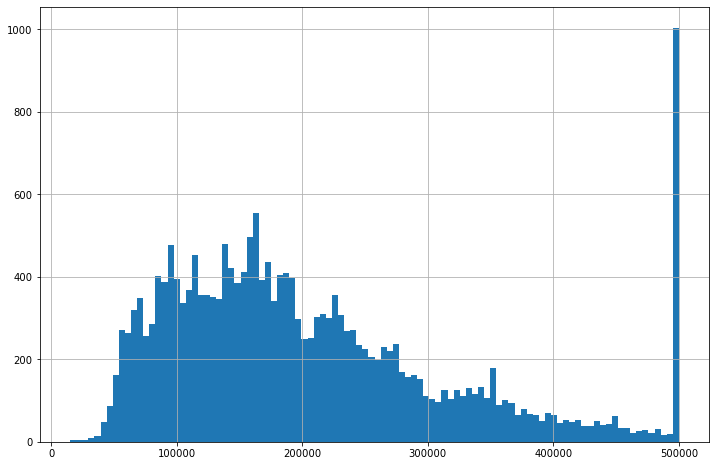

In [69]:
#Create bar graph
df.median_house_value.hist(bins = 100, figsize = (12, 8))
plt.show()

In [70]:
#Discover any correlations
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_rooms
longitude,1.00,-0.92,-0.11,0.05,0.07,0.10,0.06,-0.02,-0.05,-0.03,0.00,0.09
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14,0.11,0.00,-0.11
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11,-0.15,0.01,0.14
total_rooms,0.05,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13,0.13,-0.02,-0.19
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05,0.00,-0.03,0.08
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.01,-0.03,-0.07,0.07,0.04
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.06,-0.08,-0.03,0.07
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.01,0.01,1.00,0.69,0.33,0.02,-0.62
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.03,0.06,0.69,1.00,0.15,-0.02,-0.26
rooms_per_household,-0.03,0.11,-0.15,0.13,0.00,-0.07,-0.08,0.33,0.15,1.00,-0.00,-0.42


In [71]:
#Filter data corr for median housing value 
df.corr().median_house_value.sort_values(ascending = False)

median_house_value     1.00
median_income          0.69
rooms_per_household    0.15
total_rooms            0.13
housing_median_age     0.11
households             0.06
total_bedrooms         0.05
pop_per_household     -0.02
population            -0.03
longitude             -0.05
latitude              -0.14
bedrooms_per_rooms    -0.26
Name: median_house_value, dtype: float64

__Conclusion__ 

Positive correlations between the following:

- Higher the income / higher the housing value 
- Rooms per household / house prices (larger the house higher the price)
- Median housing age / larger districts 

Weak or no correlation(no linear) between the following:

 - house price and household 
 - population / longitude 
 
Negative correlation 

- bedrooms per room (more non bedrooms per household)

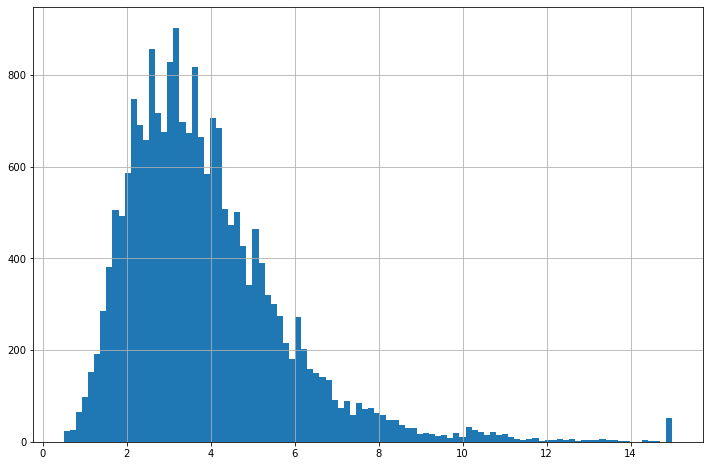

In [72]:
#Plot in histogram
df.median_income.hist(bins = 100, figsize = (12, 8))
plt.show()

- Median income between 2 to 4 

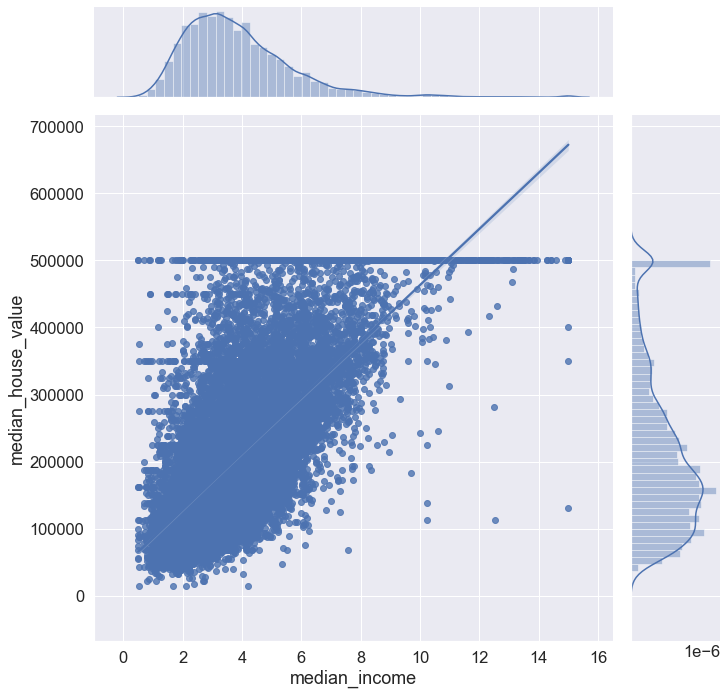

In [73]:
#Plot regression plot line/ seaborn joint plot
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "reg", height = 10)
plt.show()

 - higher the income / higher the house value 

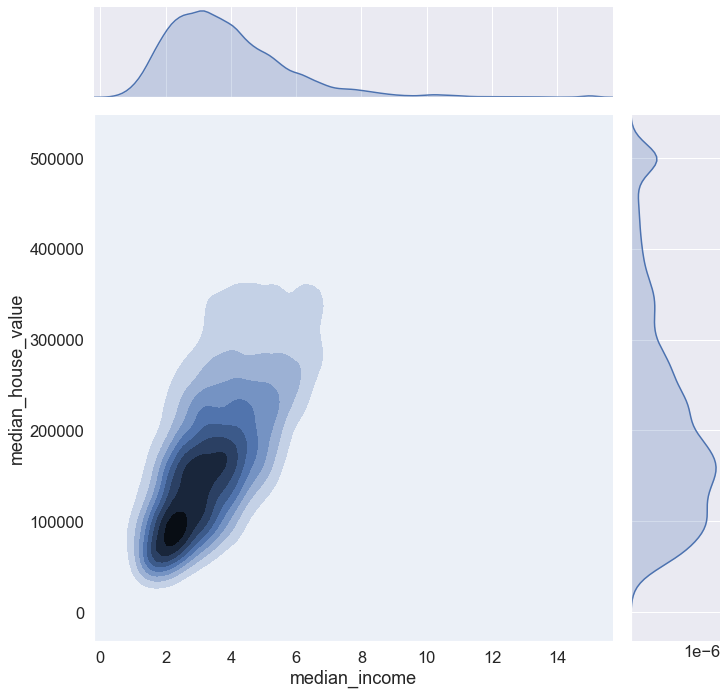

In [74]:
#Plot density graph
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "kde", height  = 10 )
plt.show()

 - Highest density 2 for median income / 100,000 for housing value  

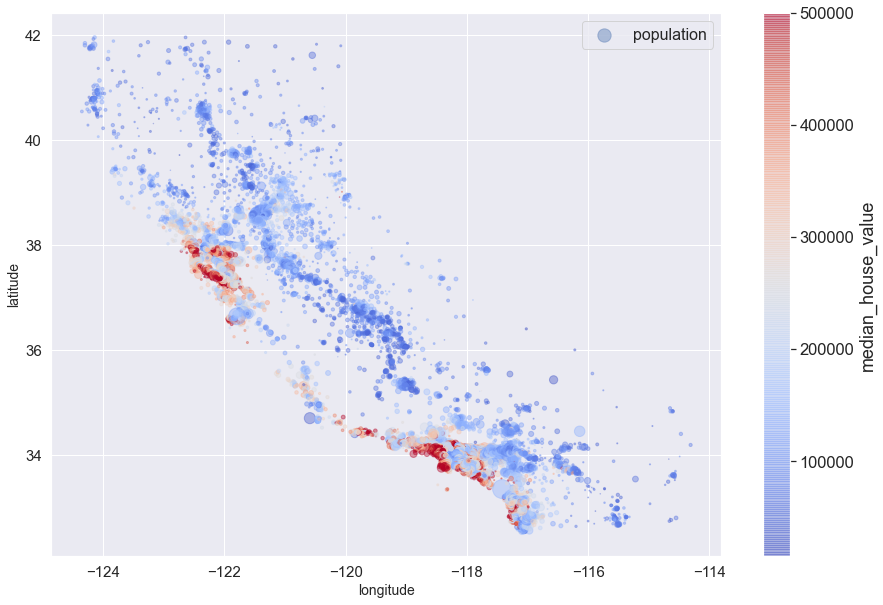

In [75]:
#Plot scatter graph
df.plot(kind = "scatter", x = "longitude", y ="latitude",
       s=df.population/100, label="population", figsize = (15, 10),
       c="median_house_value", cmap="coolwarm",
       colorbar= True, alpha=0.4, fontsize = 15, sharex = False)
plt.ylabel("latitude", fontsize = 14)
plt.xlabel("longitude", fontsize = 14)
plt.legend(fontsize=16)

__Conclusion From Scatter Graph__ (Shape represents California) 

This density graph represents the highest amount of population in relations to housing prices and area. This could mean larger cities for more housing. Higher the deman for housing the more expensive the district. 

- Highest density of housing is 100,000(MHV) / longitude of 118 & latitiude of 34
- Second highest density is 280,000(MHV) / longitude of 122 & latitiude of 37.5

In [76]:
#Import California image map to further cross reference 
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")
california_img

array([[[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       ...,

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.8274

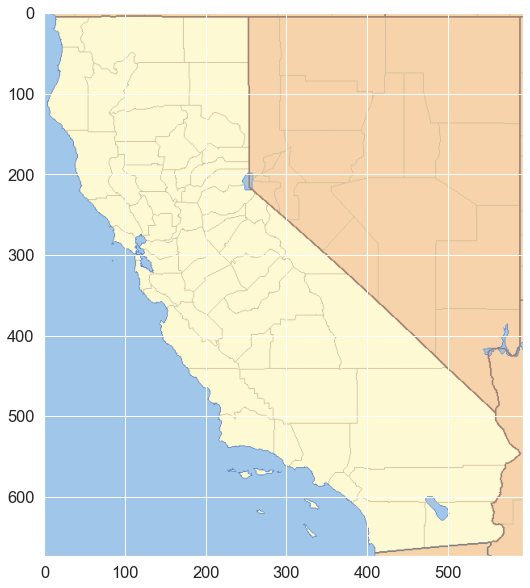

In [77]:
#use plt.show to display the image 
plt.figure(figsize = (15, 10))
plt.imshow(california_img)
plt.show()

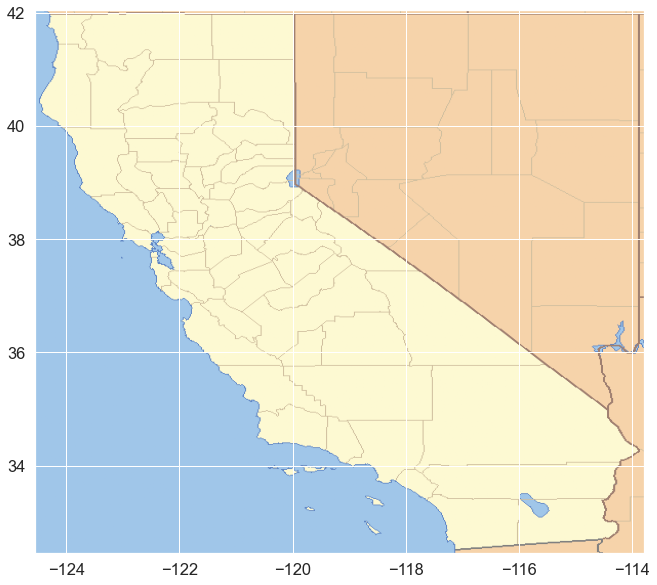

In [78]:
#Modify image to show longitude and latitude to cross referene population density 
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

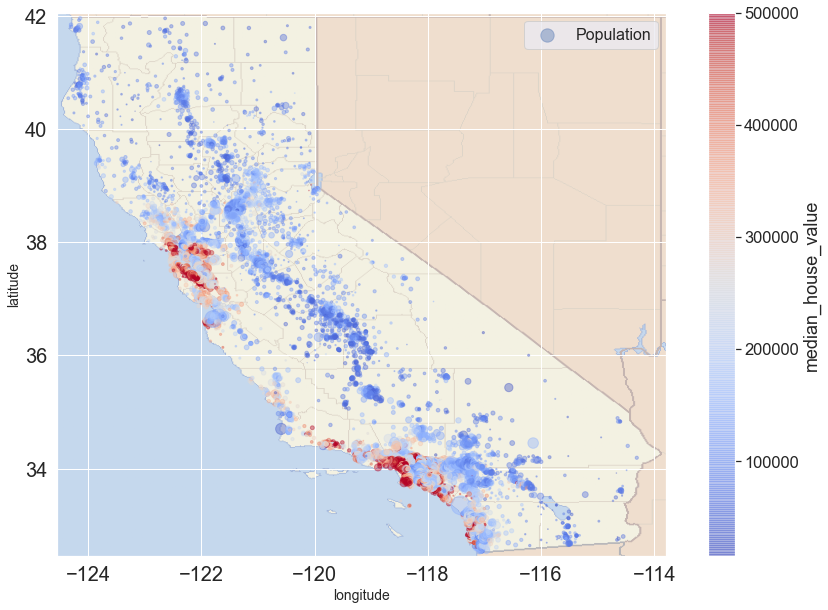

In [79]:
# Merge density graph and map of California
df.plot(kind = "scatter", x = "longitude", y = "latitude",
       s=df.population/100, label="Population", figsize = (15, 10),
       c="median_house_value", cmap="coolwarm",
       colorbar=True, alpha=0.4, fontsize = 20, sharex = False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))

plt.ylabel("latitude", fontsize = 14)
plt.xlabel("longitude", fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

__Conclusion from map and density graph__

Two major areas with highest density San Fransisco and L.A.

- Highest density closest to the ocean / ocean proximity influences housing prices and density 
- Standard of beach influences demand / demand for housing increases near ocean access

In [80]:
#Proximity 
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [81]:
#plot scatter graph to show proximity to ocean 
df_loc = df[df.ocean_proximity == prox[1]].copy()

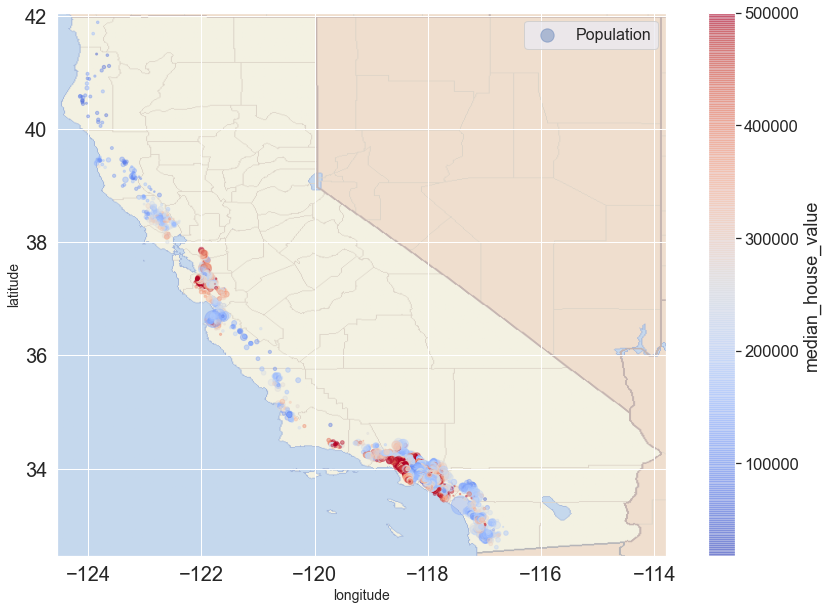

In [82]:
df_loc.plot(kind = "scatter", x="longitude", y="latitude",
           s=df_loc["population"]/100, label="Population", figsize = (15, 10),
           c="median_house_value", cmap="coolwarm",
           colorbar=True, alpha=0.4, fontsize = 20, sharex = False)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.5,
          cmap=plt.get_cmap("jet"))

plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

# Advanced Data Analysis with Seaborn 

In [83]:
#Re-examine data
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_rooms
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,2.56,0.15
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.11,0.16
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,2.80,0.13
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,2.55,0.18
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.18,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,2.56,0.22
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.12,0.22
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.33,0.22
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.12,0.22


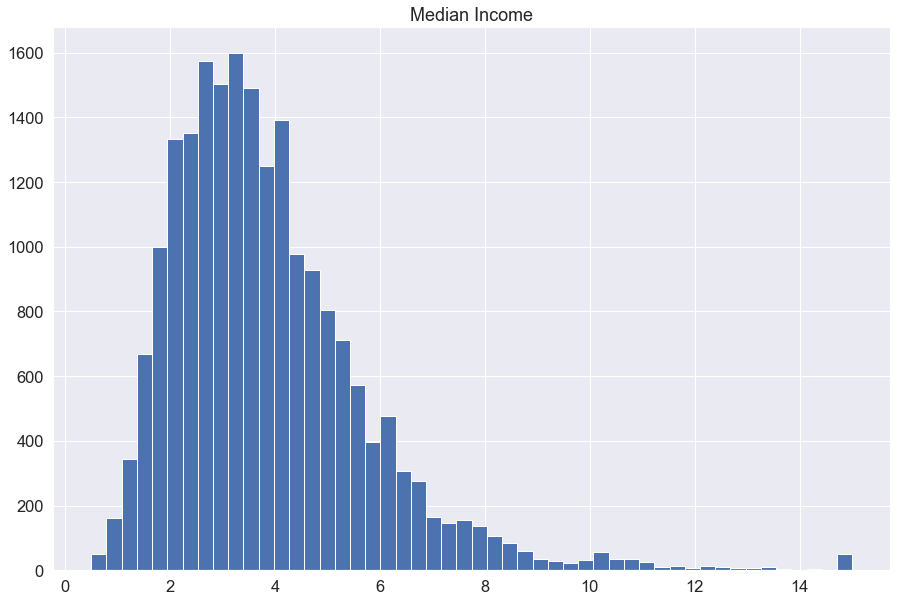

In [84]:
#Income is a key factor that influences housing prices 
df.median_income.hist(bins=50, figsize=(15,10))
plt.title("Median Income")
plt.show()

In [85]:
#Use qcut method to analyze data further 
pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

In [86]:
#Change labels to better represent data percentiles 
df["income_ct"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                          labels = ["low", "below average", "above average", "high", "very high"])

In [87]:
df.income_ct

0            very high
1            very high
2                 high
3                 high
4        above average
             ...      
20635              low
20636              low
20637              low
20638              low
20639              low
Name: income_ct, Length: 20433, dtype: category
Categories (5, object): [low < below average < above average < high < very high]

In [88]:
df.income_ct.value_counts(normalize = True)

above average   0.25
low             0.25
below average   0.25
high            0.20
very high       0.05
Name: income_ct, dtype: float64

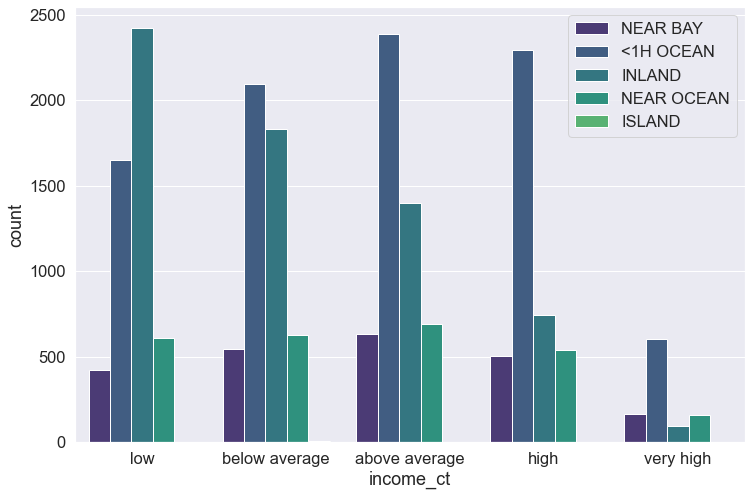

In [89]:
#Plot graph for income_ct / ocean_proximity
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette="viridis")
sns.countplot(data = df, x = "income_ct", hue = "ocean_proximity")
plt.legend(loc=1)
plt.show()

__Conclusion From Data__

- Low  = Highest inland proximity / lowest NEAR BAY

- below average = Highest <1H ocean proximity / Increase in NEAR BAY and NEAR BAY 

- above average = Highest <1H ocean proximity / Increase in NEAR BAY and NEAR BAY 

- high = Highest <1H ocean proximity / Reduced in NEAR BAY and NEAR BAY

- very high = Highest <1H ocean proximity / Lowest INLAND

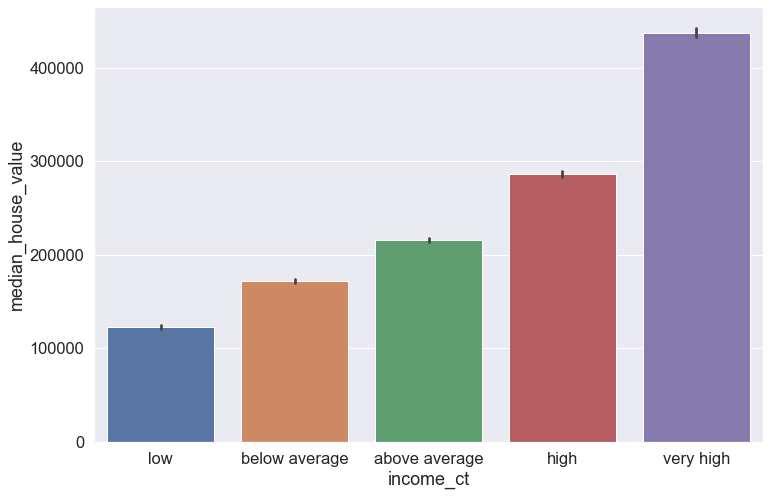

In [90]:
#Income_ct / median_house_value
plt.figure(figsize = (12, 8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "income_ct", y = "median_house_value", dodge = True)
plt.show()

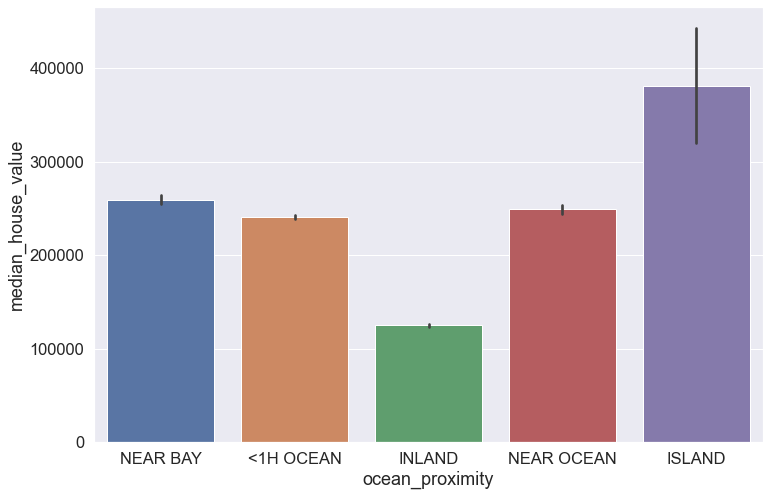

In [91]:
#Ocean_proximity / median_house_values
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.show()

In [92]:
#Groupby income_ct and ocean_proximity / drop island 
matrix = df.groupby(["income_ct", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])

In [93]:
#Floats to integers 
matrix.astype("int")

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_ct,,,,
low,161337,84820,155122,148027
below average,197236,115124,220196,208665
above average,232278,147846,261965,255293
high,292208,208095,322566,337446
very high,439784,347571,451015,468739


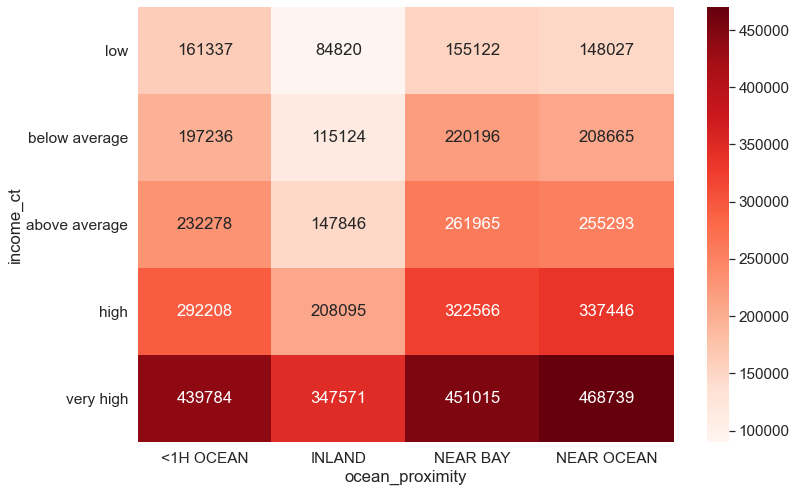

In [94]:
#Put data in a heat map
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), cmap = "Reds", annot = True, fmt = "d", vmin = 90000, vmax = 470000)
plt.show()

__Conclusion From Data__

- High income and high housing values correlate / NEAR OCEAN has the highest housing prices 

- Low income and low income housing values correlate / INLAND has the lowest housing prices 

- No significant difference between <1H OCEAN and INLAND for housing values for low income 



# Part 2 - Use the data to create Future Engineering for Machine Learning

- Transform some features 
- Separate features and labels 
- Convert text/categorical data into numerical data

In [95]:
#Median house value copy
label = df.median_house_value.copy()
label

0       452600.00
1       358500.00
2       352100.00
3       341300.00
4       342200.00
           ...   
20635    78100.00
20636    77100.00
20637    92300.00
20638    84700.00
20639    89400.00
Name: median_house_value, Length: 20433, dtype: float64

In [96]:
#Drop median house values from label
features = df.drop(columns = ["median_house_value"])
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_rooms,income_ct
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,NEAR BAY,6.98,2.56,0.15,very high
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,NEAR BAY,6.24,2.11,0.16,very high
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,NEAR BAY,8.29,2.80,0.13,high
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,NEAR BAY,5.82,2.55,0.18,high
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,NEAR BAY,6.28,2.18,0.17,above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,INLAND,5.05,2.56,0.22,low
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,INLAND,6.11,3.12,0.22,low
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,INLAND,5.21,2.33,0.22,low
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,INLAND,5.33,2.12,0.22,low


In [97]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20433 non-null  float64 
 1   latitude             20433 non-null  float64 
 2   housing_median_age   20433 non-null  float64 
 3   total_rooms          20433 non-null  float64 
 4   total_bedrooms       20433 non-null  float64 
 5   population           20433 non-null  float64 
 6   households           20433 non-null  float64 
 7   median_income        20433 non-null  float64 
 8   ocean_proximity      20433 non-null  object  
 9   rooms_per_household  20433 non-null  float64 
 10  pop_per_household    20433 non-null  float64 
 11  bedrooms_per_rooms   20433 non-null  float64 
 12  income_ct            20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory usage: 2.7+ MB


- Typically numeric features have very different scales / normalize numeric features 
- Each machine learning has its own pros and cons if you normalize numeric features 

In [98]:
features.select_dtypes("float")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_rooms
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,6.98,2.56,0.15
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,6.24,2.11,0.16
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,8.29,2.80,0.13
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,5.82,2.55,0.18
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,6.28,2.18,0.17
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,5.05,2.56,0.22
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,6.11,3.12,0.22
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,5.21,2.33,0.22
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,5.33,2.12,0.22


In [99]:
#Import scipy for statistical library
import scipy.stats as stats 

In [100]:
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_rooms
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12


In [101]:
#Display only 2 decimals for floats
pd.options.display.float_format = "{:.2f}".format

In [102]:
#Calculate standard deviation 
feat1.agg(["mean", "std"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_rooms
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Convert text data into numbers for Mchine Learning  

- Typically Machine Learning cannot convert text/categorical data into numbers 

In [103]:
#Explore ocean_proximity
df.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [104]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

- 5 categorical features 

In [105]:
# Use dummies variables to convert the 5 categorical features (changes to binary code)  
dummies = pd.get_dummies(features.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


- Extract 1 column or can cause a multi co-linearity problem 

In [106]:
#concat columns 
features = pd.concat([feat1, dummies, df.income_ct], axis = 1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_ct
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,very high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,very high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,high
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,high
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,low


- Standardized numerical columns
- Dummy features 
- Income catergories 

# Split the Data into Training set and Test Set 

- To know how well the module works is to create a training set from a test size
- Depending on the size of data with influence test size 

In [107]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_ct
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,very high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,very high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,high
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,high
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,low


In [108]:
#create test size 20%
test_size = 0.2

In [109]:
#Use Sample method 
X_test = features.sample(frac = test_size, random_state = 123)

In [28]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_ct
19121,-1.53,1.22,0.90,-0.30,nan,-0.34,-0.27,-0.04,1,0,0,0,0,above average
20019,0.26,0.21,-1.56,0.30,nan,0.29,0.18,0.08,0,1,0,0,0,above average
15104,1.29,-1.30,-1.32,0.43,nan,1.67,0.44,0.11,1,0,0,0,0,above average
3720,0.57,-0.67,-0.13,0.26,nan,1.75,1.17,-0.86,1,0,0,0,0,low
8938,0.55,-0.76,0.98,0.03,nan,-0.33,-0.06,0.29,1,0,0,0,0,above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,-1.31,1.00,1.30,-0.36,nan,-0.26,-0.39,-0.61,0,0,0,1,0,below average
4596,0.64,-0.74,0.98,-0.39,nan,1.33,0.53,-1.28,1,0,0,0,0,low
16287,-0.85,1.07,0.19,-0.83,nan,-0.75,-0.90,-1.15,0,1,0,0,0,low
5771,0.65,-0.69,-0.53,-0.17,nan,0.23,0.16,-0.63,1,0,0,0,0,below average


- Larger the dataset the more simple random sampling approach is used

In [110]:
#Compare the two datasets / X_test and features 
X_test.income_ct.value_counts(normalize = True)

above average   0.25
below average   0.25
low             0.25
high            0.20
very high       0.05
Name: income_ct, dtype: float64

In [111]:
features.income_ct.value_counts(normalize = True)

above average   0.25
low             0.25
below average   0.25
high            0.20
very high       0.05
Name: income_ct, dtype: float64

In [112]:
X_test.index

Int64Index([14354, 12908, 19545, 12188, 14786,  9941,  3179,  4650, 15550,
            17190,
            ...
             3992, 10261, 10862, 10863, 13864, 10262,  3614, 19296,  5826,
            15383],
           dtype='int64', length=4087)

In [113]:
# Check if the row labels are already in the test set 
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [114]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_ct
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,very high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,very high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,high
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,high
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,low


In [115]:
X_train.income_ct.value_counts(normalize = True)

low             0.25
below average   0.25
above average   0.25
high            0.20
very high       0.05
Name: income_ct, dtype: float64

In [116]:
X_train = X_train.sample(frac = 1, random_state =123)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_ct
9896,-1.34,1.24,-1.48,-0.76,-0.90,-0.83,-0.84,1.43,-0.02,-0.04,-0.83,0,0,0,1,0,high
6749,0.74,-0.71,1.06,-0.00,-0.03,0.06,0.06,0.04,-0.16,-0.02,-0.23,1,0,0,0,0,above average
13825,1.21,-0.54,0.19,-1.09,-1.15,-1.09,-1.16,-0.92,-0.25,0.03,-0.09,0,1,0,0,0,low
2842,0.29,-0.11,0.59,-0.55,-0.63,-0.66,-0.63,-0.47,0.06,-0.04,-0.41,0,1,0,0,0,below average
10112,0.81,-0.79,0.11,-0.48,-0.55,-0.51,-0.50,0.34,-0.11,-0.03,-0.36,1,0,0,0,0,above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1.14,-1.16,-1.40,-0.04,-0.22,-0.42,-0.13,0.10,0.11,-0.09,-0.68,0,0,0,0,1,above average
1689,-1.34,1.12,-1.88,0.55,0.59,0.55,0.57,0.62,-0.02,-0.02,-0.15,0,0,0,1,0,high
14698,1.24,-1.33,0.19,-0.28,-0.29,-0.49,-0.30,-0.36,-0.08,-0.08,-0.11,0,0,0,0,1,below average
19870,0.11,0.33,-1.40,0.27,0.19,-0.07,0.17,-0.47,0.11,-0.07,-0.37,0,1,0,0,0,below average


In [117]:
#Drop categories 
X_train.drop(columns = ["income_ct"], inplace = True)

In [118]:
X_test.drop(columns = ["income_ct"], inplace = True)

In [119]:
#Save the median house prices anf filter 
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]

In [120]:
y_train

9896    218100.00
6749    257200.00
13825    64800.00
2842     73100.00
10112   241100.00
           ...   
15460    87500.00
1689    184800.00
14698   177700.00
19870   132000.00
4461    153100.00
Name: median_house_value, Length: 16346, dtype: float64

__Conclusion from test and train data__

- Both have 16346 total count
- Both starts at 9896 

# Training the ML Model (Random Forest Regressor)

- Regression models - which algorithm to use to train the ML model 

Train the ML set with the train set
Based on previous feature finding will train the module accordingly  


In [121]:
# Import necessary libraries 
from sklearn.ensemble import RandomForestRegressor 

In [122]:
forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 500,
                                  max_features= "sqrt", max_depth = 75, min_samples_split=2)

In [123]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [124]:
forest_reg.score(X_train, y_train)

0.9758470860678036

In [125]:
from sklearn.metrics import mean_squared_error

In [127]:
pred = forest_reg.predict(X_train)
pred

array([238374.608, 246813.8  ,  74191.4  , ..., 184930.402, 117595.4  ,
       187186.008])

In [128]:
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18023.671210966968

# Evaluating the Model on the Test Set

- Try to measure the error 
- Find more intuitive matrix for our model 
- Root mean squared error

In [129]:
forest_reg

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [131]:
#Pass X and Y test 
forest_reg.score(X_test, y_test)

0.825152593253362

In [132]:
pred = forest_reg.predict(X_test)
pred

array([224965.808, 129246.8  ,  67903.   , ..., 222406.402, 322985.02 ,
       268692.8  ])

In [134]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47348.34022326726

In [135]:
#Compare predicted values VS True House prices 
comp = pd.DataFrame(data = {"True_V": y_test, "Pred":pred})
comp

,True_V,Pred
14354,101800.00,224965.81
12908,213000.00,129246.80
19545,58800.00,67903.00
12188,111300.00,187250.02
14786,174100.00,160228.40
...,...,...
10262,272200.00,296562.20
3614,175900.00,183863.20
19296,215900.00,222406.40
5826,326100.00,322985.02


 -Some values are very high in error

In [136]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

14354   123165.81
12908    83753.20
19545     9103.00
12188    75950.02
14786    13871.60
           ...   
10262    24362.20
3614      7963.20
19296     6506.40
5826      3114.98
15383    22807.20
Length: 4087, dtype: float64

In [137]:
#Mean average difference 
mae = ae.mean()
mae

31722.632696354325

- Over 30,000 mean average difference between the values 

# Feature Importance 

- Find relative importance for the module

In [138]:
#Numpy array
forest_reg.feature_importances_

array([8.43251997e-02, 7.63824246e-02, 4.20571593e-02, 2.28712182e-02,
       2.01285036e-02, 2.28577613e-02, 1.96337714e-02, 2.80813190e-01,
       6.50088158e-02, 9.89248218e-02, 9.71199460e-02, 1.91328297e-02,
       1.36700488e-01, 2.65441330e-04, 5.35959721e-03, 8.41883258e-03])

In [141]:
#feature importances
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)
feature_imp

median_income         0.28
INLAND                0.14
pop_per_household     0.10
bedrooms_per_rooms    0.10
longitude             0.08
latitude              0.08
rooms_per_household   0.07
housing_median_age    0.04
total_rooms           0.02
population            0.02
total_bedrooms        0.02
households            0.02
<1H OCEAN             0.02
NEAR OCEAN            0.01
NEAR BAY              0.01
ISLAND                0.00
dtype: float64

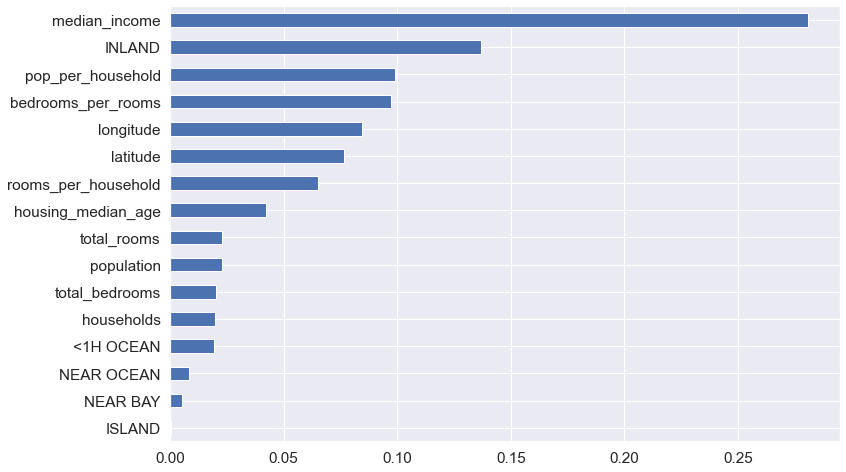

In [142]:
#Visualize data
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()

_Conclusion from Data_

### Top features thats influence housing price 

- Median income has the highest importance
- Inland or not (location)
- Bedrooms her household  
- Rooms per house 